In [35]:
%pip install pdf2image

from IPython.display import Image
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import matplotlib.style as style
from pdf2image import convert_from_path
import os

style.use('dark_background')
plt.rcParams['text.usetex'] = False


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [36]:
##problem 1
#turing machine rules and simulation
rules = {('S','▷'):('I','▷'),('I','0'):('I','0'),('I','1'):('II','0'),('II','0'):('I','1'),('II','1'):('II','1'),('II','∅'):('I','1'),('I','∅'):('F','∅')}

def simulate(tape):
    tape = tape + ['∅']*10
    state='S'
    pos=0
    step=0
    while state!='F' and step<100:
        sym = tape[pos]
        new_state,new_sym = rules[(state,sym)]
        tape[pos] = new_sym
        state = new_state
        pos += 1
        step += 1
    return tape

#initial tapes from problem statement
tape1 = ['▷','0','1']
tape2 = ['▷','1','0','1']
res1 = simulate(tape1.copy())
res2 = simulate(tape2.copy())
print('initial tape1:', tape1)
print('final tape1:', res1[:5])
print('initial tape2:', tape2)
print('final tape2:', res2[:6])

#verify operation on a range of binary strings
def trim_out(t):
    out=[]
    for s in t[1:]:
        if s=='∅':
            break
        out.append(s)
    return ''.join(out)

def val_rev(bits):
    v=0
    for i,b in enumerate(bits):
        v += int(b)*(2**i)
    return v

#i already posited in my solutions
#ifi show doubling behaviour for numbers interpreted with lsb at left, then i'm not crazy
for bits in ['0','1','10','11','101','111','11001']:
    t = ['▷'] + list(bits)
    out = trim_out(simulate(t.copy()))
    print(bits, '->', out, 'values', val_rev(bits), '->', val_rev(out))

initial tape1: ['▷', '0', '1']
final tape1: ['▷', '0', '0', '1', '∅']
initial tape2: ['▷', '1', '0', '1']
final tape2: ['▷', '0', '1', '0', '1', '∅']
0 -> 0 values 0 -> 0
1 -> 01 values 1 -> 2
10 -> 01 values 1 -> 2
11 -> 011 values 3 -> 6
101 -> 0101 values 5 -> 10
111 -> 0111 values 7 -> 14
11001 -> 011001 values 19 -> 38


In [37]:
##problem 2 part a
#define symbols
n,N,eta = sp.symbols('n N eta', integer=True, positive=True)
#p(n|N) for detector efficiency
P_n_given_N = sp.factorial(N)/(sp.factorial(n)*sp.factorial(N-n)) * eta**n * (1-eta)**(N-n)
display(P_n_given_N.simplify())

eta**n*(1 - eta)**(N - n)*binomial(N, n)

(-lambda*(eta - 1))**(N - n)*exp(lambda*(eta - 1))/factorial(N - n)

ValueError: could not broadcast input array from shape (0,) into shape (15,)

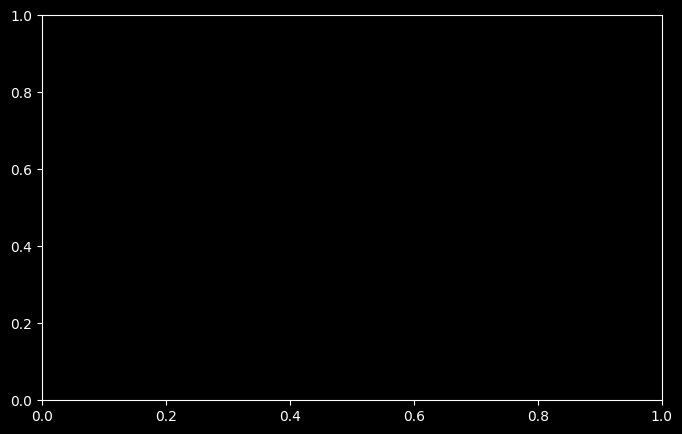

In [38]:
##problem 2 part b
#poisson prior for total particles
lam = sp.symbols('lambda', positive=True)
#posterior p(N|n) prop. to p(n|N)*p(N)
N_sym = sp.symbols('N', integer=True, nonnegative=True)
posterior = sp.exp(-(1-eta)*lam) * ((1-eta)*lam)**(N_sym-n) / sp.factorial(N_sym-n)
display(sp.simplify(posterior))

#numeric example plot
lam_val = 5
eta_val = 0.7
n_val = 60
N_vals = np.arange(n_val, n_val+15)
if N_vals.size > 0:
    plt.figure(figsize=(8,5))
    plt.stem(N_vals, p_vals, basefmt=' ')
    plt.xlabel('N')
    plt.ylabel('P(N|n)')
    plt.title(f'posterior with poisson prior, eta={eta_val}, lambda={lam_val}, n={n_val}')
    plt.grid(True)
    plt.show()
else:
    print('N_vals is empty, skipping plot')



ValueError: zero-size array to reduction operation minimum which has no identity

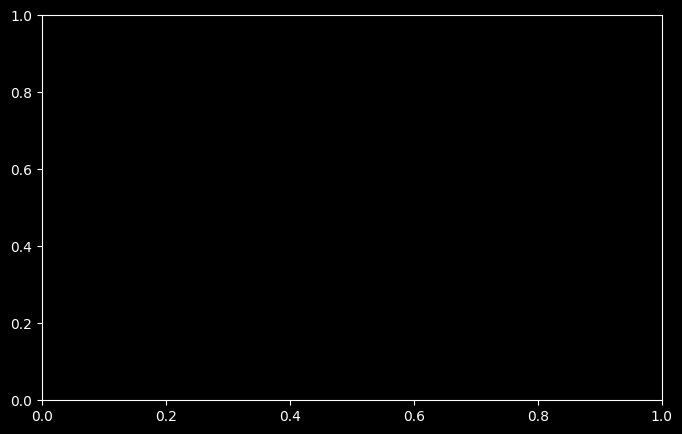

In [ ]:
from scipy.special import factorial, comb


#numeric posterior using python factorial

p_vals = np.exp(-(1-eta_val)*lam_val) * (((1-eta_val)*lam_val)**(N_vals-n_val) / factorial(N_vals-n_val))
plt.figure(figsize=(8,5))
plt.stem(N_vals, p_vals, basefmt=' ')
plt.xlabel('N')
plt.ylabel('P(N|n)')
plt.title('posterior with poisson prior, eta='+str(eta_val)+', lambda='+str(lam_val)+', n='+str(n_val))
plt.grid(True)
plt.show()

# Posterior with Poisson prior (using numpy/scipy)
p_vals = np.exp(-(1-eta_val)*lam_val) * (((1-eta_val)*lam_val)**(N_vals-n_val) / factorial(N_vals-n_val))
plt.figure(figsize=(8,5))
plt.stem(N_vals, p_vals, basefmt=' ')
plt.xlabel('N')
plt.ylabel('P(N|n)')
plt.title('posterior with poisson prior, eta='+str(eta_val)+', lambda='+str(lam_val)+', n='+str(n_val))
plt.grid(True)
plt.show()

# Uniform prior (using numpy/scipy)
N_vals = np.arange(n_val, N_max+1) if n_val <= N_max else np.array([])
if N_vals.size > 0:
	coeff = comb(N_vals, n_val)
	p_unnorm = coeff * eta_val**n_val * (1-eta_val)**(N_vals-n_val)
	p_norm = p_unnorm / np.sum(p_unnorm)
	plt.figure(figsize=(8,5))
	plt.stem(N_vals, p_norm, basefmt=' ')
	plt.xlabel('N')
	plt.ylabel('P(N|n)')
	plt.title('posterior with uniform prior (cutoff '+str(N_max)+'), eta='+str(eta_val)+', n='+str(n_val))
	plt.grid(True)
	plt.show()
else:
	print("N_vals is empty: n_val > N_max. No plot generated.")
